# **Longitudinal data analysis**

# **#Pre-class assignment**

In [1]:
library(foreign)

In [2]:
temp <- tempfile()
download.file("https://drive.google.com/uc?id=1pAy5L-BHCcAIVg1h4jOaPaWWlfPBYMVO&authuser=0&export=download", temp)
ccex<-readRDS(temp)

### **Data Dictionary**

*   STRATA [Matched set of subjects]

*   PIDGEN [Individual ID generated]

*   SEX [Sex] : Male, Female

*   AGE [Age group] : 1-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80

*   STATUS [Groups of the subjects] : Case = TRUE, Control = FALSE

*   DIAGCODE [ICD-10 diagnoses]

*   DIAGTYPE [Type of ICD-10 diagnosis] : 1 = Principle diagnosis, 2 = Comorbidity, 3 = Complication, 4 = Other, 5 = External cause, 6 = Additional code, 7 = Morphology code

In [4]:
head(ccex)

,STRATA,PIDGEN,SEX,AGE,STATUS,DIAGCODE,DIAGTYPE,P_WEEKS
,<chr>,<chr>,<chr>,<fct>,<lgl>,<chr>,<int>,<int>
1,2070,0001,Male,"(20,30]",TRUE,I828,1,25
2,1961,0002,Female,"(30,40]",FALSE,J181,1,28
3,1264,0003,Male,"(30,40]",FALSE,C384,1,41
4,1264,0003,Male,"(30,40]",FALSE,M8565,5,21
5,1758,0004,Male,"(30,40]",TRUE,D135,1,6
6,2138,2305,Female,"(30,40]",TRUE,J90,1,49


**Explore the dataset downloaded as followings:**

Note that, the data were recorded as a long format, each subject could be diagnosed with many ICD-10 diagnoses. Hence, the PIDGEN may be repeated.
For further details, see: Kumwichar, P., & Chongsuvivatwong, V. (2022). Data mining for ICD-10 admission diagnoses preceding tuberculosis within 1 year among non-HIV and non-diabetes patients. Tropical Medicine and Infectious Disease, 7(4), 61. [link text](https://www.mdpi.com/2414-6366/7/4/61/htm)

1. How many patients in the dataset?

In [ ]:
#your codes

2. How many bacteriologically confirmed PTB cases in the dataset? [Hint: ICD-10 as A15 or A15.1-9]

In [ ]:
#your codes

3. How many bacteriologically confirmed PTB cases who were diagnosed as a princicple diagnosis?

In [ ]:
#your codes

4. Visulize the population pyramid for the bacteriologically confirmed PTB cases?

In [ ]:
#your codes

# **#Class section**

Note that, you can read through this section before the class, 
# but you **don't** need to **do the quizzes**.

**Preparation**

Install package epiDisplay

In [3]:
install.packages("epiDisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import package.

In [5]:
library(tidyverse)
library(epiDisplay)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: survival

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nnet


Attaching package: ‘epiDisplay’


The following object is masked from ‘package:ggplot2’:

    alpha




# **Practice**

## **Pipe**

In [7]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [ ]:
airquality$Wind[1:10]

[1]  7.4  8.0 12.6 11.5 14.3 14.9  8.6 13.8 20.1  8.6

In [ ]:
round(exp(diff(log(airquality$Wind[1:10]))),1)

[1] 1.1 1.6 0.9 1.2 1.0 0.6 1.6 1.5 0.4

In [ ]:
airquality %>%       #In the airquality data set
   slice(1:10) %>%   #In the first 10 rows
   .$Wind %>%        #of variable Wind
   log() %>%         #Find the log of each day
   diff() %>%        #Difference, adjacent days
   exp() %>%         #Exponentiation
   round(1)          #Round to 1 digit decimal

[1] 1.1 1.6 0.9 1.2 1.0 0.6 1.6 1.5 0.4

Quiz: calculate the differences between square root of the ozone levels in the adjacent days

In [ ]:
#your turn

## **Arrange**

In [ ]:
airquality %>% slice(1:10)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9


In [ ]:
airquality %>% slice(1:10) %>% arrange(Wind)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
23,299,8.6,65,5,7
NA,194,8.6,69,5,10
18,313,11.5,62,5,4
12,149,12.6,74,5,3
19,99,13.8,59,5,8
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [ ]:
airquality %>% slice(1:10) %>% arrange(desc(Wind))

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
8,19,20.1,61,5,9
28,NA,14.9,66,5,6
NA,NA,14.3,56,5,5
19,99,13.8,59,5,8
12,149,12.6,74,5,3
18,313,11.5,62,5,4
23,299,8.6,65,5,7
NA,194,8.6,69,5,10
36,118,8.0,72,5,2


In [ ]:
airquality %>% slice(1:10) %>% arrange(desc(Wind),desc(Temp))

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
8,19,20.1,61,5,9
28,NA,14.9,66,5,6
NA,NA,14.3,56,5,5
19,99,13.8,59,5,8
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,194,8.6,69,5,10
23,299,8.6,65,5,7
36,118,8.0,72,5,2


In [ ]:
airquality %>% slice(1:10) %>% arrange(desc(Day),desc(Ozone),Temp,Month)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
NA,194,8.6,69,5,10
8,19,20.1,61,5,9
19,99,13.8,59,5,8
23,299,8.6,65,5,7
28,NA,14.9,66,5,6
NA,NA,14.3,56,5,5
18,313,11.5,62,5,4
12,149,12.6,74,5,3
36,118,8.0,72,5,2


In [ ]:
airquality %>% slice(1:10) %>% arrange(desc(Day))

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
NA,194,8.6,69,5,10
8,19,20.1,61,5,9
19,99,13.8,59,5,8
23,299,8.6,65,5,7
28,NA,14.9,66,5,6
NA,NA,14.3,56,5,5
18,313,11.5,62,5,4
12,149,12.6,74,5,3
36,118,8.0,72,5,2


Quiz: repeat the last result without utilization of desc() function.

In [ ]:
#your turn

## **Group_by**

In [ ]:
airquality

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9


In [ ]:
airquality %>% group_by(Month) %>% count()

Month,n
<int>,<int>
5,31
6,30
7,31
8,31
9,30


In [ ]:
airquality %>% group_by(Month, Temp>70) %>% count()

Month,Temp > 70,n
<int>,<lgl>,<int>
5,FALSE,24
5,TRUE,7
6,FALSE,2
6,TRUE,28
7,TRUE,31
8,TRUE,31
9,FALSE,7
9,TRUE,23


In [ ]:
airquality %>% group_by(Month) %>% summarise(Average_wind=mean(Wind))

Month,Average_wind
<int>,<dbl>
5,11.622581
6,10.266667
7,8.941935
8,8.793548
9,10.180000


In [ ]:
airquality %>% group_by(Month) %>% summarise(Median_Solar.R = median(Solar.R),Max_wind=max(Wind))

Month,Median_Solar.R,Max_wind
<int>,<dbl>,<dbl>
5,NA,20.1
6,188.5,20.7
7,253.0,14.9
8,NA,15.5
9,192.0,16.6


Quiz: Calculate standard error of wind speed in each month.

In [ ]:
#your turn

## **Filter**

In [ ]:
airquality[1:10,]

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9


In [ ]:
airquality[1:10,] %>% filter(Temp>70 | Day>5)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
36,118,8.0,72,5,2
12,149,12.6,74,5,3
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9
NA,194,8.6,69,5,10


In [ ]:
airquality %>% filter(Day == 1 | Day == 2| Day == 3| Day == 4|Day == 5)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
NA,286,8.6,78,6,1
NA,287,9.7,74,6,2
NA,242,16.1,67,6,3
NA,186,9.2,84,6,4


In [ ]:
airquality %>% filter(Day %in% 1:5)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
NA,286,8.6,78,6,1
NA,287,9.7,74,6,2
NA,242,16.1,67,6,3
NA,186,9.2,84,6,4


In [ ]:
airquality %>% filter(Temp %in% c(69,81,91))

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
NA,194,8.6,69,5,10
16,256,9.7,69,5,12
45,252,14.9,81,5,29
32,236,9.2,81,7,3
27,175,14.9,81,7,13
NA,291,14.9,91,7,14
48,260,6.9,81,7,16
NA,258,9.7,81,7,22
59,254,9.2,81,7,31


Quiz: filter only the records that temperature is higher than 5-time of wind speed.

In [ ]:
#your turn

## **Mutate**

In [ ]:
airquality[1:10,]

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9


In [ ]:
airquality[1:10,] %>% mutate(Wind = sqrt(Wind))

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,2.720294,67,5,1
2,36,118,2.828427,72,5,2
3,12,149,3.549648,74,5,3
4,18,313,3.391165,62,5,4
5,NA,NA,3.781534,56,5,5
6,28,NA,3.860052,66,5,6
7,23,299,2.932576,65,5,7
8,19,99,3.714835,59,5,8
9,8,19,4.483302,61,5,9


In [ ]:
airquality[1:10,] %>% mutate(wind2 = Wind^2)

,Ozone,Solar.R,Wind,Temp,Month,Day,wind2
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,41,190,7.4,67,5,1,54.76
2,36,118,8.0,72,5,2,64.00
3,12,149,12.6,74,5,3,158.76
4,18,313,11.5,62,5,4,132.25
5,NA,NA,14.3,56,5,5,204.49
6,28,NA,14.9,66,5,6,222.01
7,23,299,8.6,65,5,7,73.96
8,19,99,13.8,59,5,8,190.44
9,8,19,20.1,61,5,9,404.01


Quiz: Create new variable indicating wind speed per temperature unit for the full dataset

In [ ]:
#your turn

## **Using tidyverse with epiDisplay**

**tab1**

,Frequency,Percent,Cum. percent
1.7,1,0.7,0.7
2.3,1,0.7,1.3
2.8,1,0.7,2.0
3.4,1,0.7,2.6
4,1,0.7,3.3
4.1,1,0.7,3.9
4.6,4,2.6,6.5
5.1,3,2.0,8.5
5.7,3,2.0,10.5
6.3,8,5.2,15.7


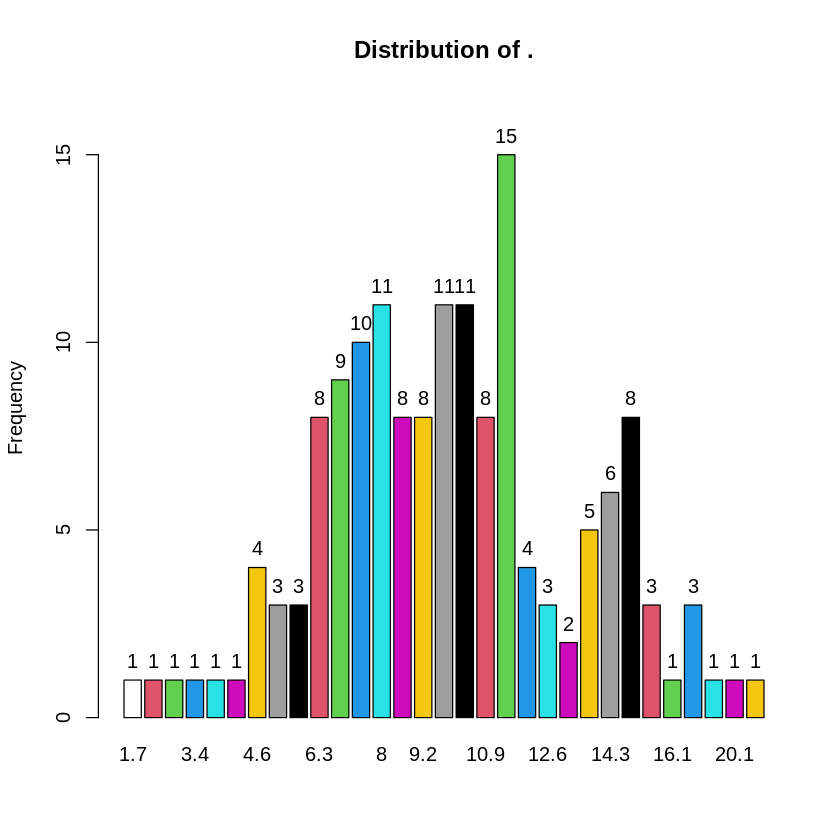

In [ ]:
airquality %>% dplyr::select(Wind) %>% tab1()

**summ**

In [ ]:
airquality %>% dplyr::select(Ozone) %>% summ()

,Var. name,obs.,mean,median,s.d.,min.,max.
1,Ozone,116,42.13,31.5,32.99,1,168


**tableStack**

In [ ]:
tableStack(Wind,by=Month,dat=airquality)

           5          6          7       8         9         
Total      31         30         31      31        30        
                                                             
Wind                                                         
  mean(SD) 11.6 (3.5) 10.3 (3.8) 8.9 (3) 8.8 (3.2) 10.2 (3.5)
                                                             
           Test stat.                      P value
Total                                             
                                                  
Wind       ANOVA F-test (4, 148 df) = 3.53 0.009  
  mean(SD)                                        
                                                  

## **Reshape**

Prepare data

In [ ]:
rates <- data.frame(country=c("TH","CH","US"),
y2020 = c(3000,5500,5000),
y2021 = c(4000,6500,4000),
y2022 = c(5000,7500,8000))

Use gather() to reshape 'rates'

In [ ]:
gather(rates, "year", "n", c(2,3))

country,y2022,year,n
<chr>,<dbl>,<chr>,<dbl>
TH,5000,y2020,3000
CH,7500,y2020,5500
US,8000,y2020,5000
TH,5000,y2021,4000
CH,7500,y2021,6500
US,8000,y2021,4000


In [ ]:
rates

country,y2020,y2021,y2022
<chr>,<dbl>,<dbl>,<dbl>
TH,3000,4000,5000
CH,5500,6500,7500
US,5000,4000,8000


In [ ]:
pollution <- data.frame(city=c("New York","New York","London","London","Beijing","Beijing"),
size=c("large","small","large","small","large","small"),
amount=c(23,14,22,16,121,56))

Use spread() to reshape 'pollution'

In [ ]:
pollution %>% spread(size,amount) %>% arrange(desc(city))

city,large,small
<chr>,<dbl>,<dbl>
New York,23,14
London,22,16
Beijing,121,56


## **Joining data**

prepare data

In [ ]:
y<-data.frame(x1=c("A","B","C"),x2=1:3)
z<-data.frame(x1=c("B","C","D"),x2=c(2,3,4))

In [ ]:
songs<-data.frame(song=c("Across the Universe","Come Together","Hello, Goodbye","Peggy Sue"),
name=c("John","John","Paul","Buddy"))
artists<-data.frame(name=c("George","John","Paul","Ringo"),
plays=c("sitar","guitar","bass","drums"))
songs2<-data.frame(song=c("Across the Universe","Come Together","Hello, Goodbye","Peggy Sue"),
first=c("John","John","Paul","Buddy"),
last=c("Lennon","Lennon","McCartney","Holly"))
artists2<-data.frame(first=c("George","John","Paul","Ringo","Paul","John"),
last=c("Harrison","Lennon","McCartney","Starr","Simon","Coltrane"),
plays=c("sitar","guitar","bass","drums","guitar","sax"))

**Column binding**

In [ ]:
bind_cols(y, z)

New names:
• `x1` -> `x1...1`
• `x2` -> `x2...2`
• `x1` -> `x1...3`
• `x2` -> `x2...4`


x1...1,x2...2,x1...3,x2...4
<chr>,<int>,<chr>,<dbl>
A,1,B,2
B,2,C,3
C,3,D,4


**Row binding**

In [ ]:
bind_rows(y, z)

x1,x2
<chr>,<dbl>
A,1
B,2
C,3
B,2
C,3
D,4


**Union**

In [ ]:
union(y, z)

x1,x2
<chr>,<dbl>
A,1
B,2
C,3
D,4


**Intersect**

In [ ]:
intersect(y, z)

x1,x2
<chr>,<dbl>
B,2
C,3


**Setdiff**

In [ ]:
setdiff(y, z)

x1,x2
<chr>,<dbl>
A,1


**Left join**

In [ ]:
songs

song,name
<chr>,<chr>
Across the Universe,John
Come Together,John
"Hello, Goodbye",Paul
Peggy Sue,Buddy


In [ ]:
left_join(songs, artists, by = "name")

song,name,plays
<chr>,<chr>,<chr>
Across the Universe,John,guitar
Come Together,John,guitar
"Hello, Goodbye",Paul,bass
Peggy Sue,Buddy,NA


In [ ]:
songs2

song,first,last
<chr>,<chr>,<chr>
Across the Universe,John,Lennon
Come Together,John,Lennon
"Hello, Goodbye",Paul,McCartney
Peggy Sue,Buddy,Holly


In [ ]:
left_join(songs2, artists2, by = c("first", "last"))

song,first,last,plays
<chr>,<chr>,<chr>,<chr>
Across the Universe,John,Lennon,guitar
Come Together,John,Lennon,guitar
"Hello, Goodbye",Paul,McCartney,bass
Peggy Sue,Buddy,Holly,NA


In [ ]:
left_join(artists2, songs2, by = c("first", "last"))

first,last,plays,song
<chr>,<chr>,<chr>,<chr>
George,Harrison,sitar,NA
John,Lennon,guitar,Across the Universe
John,Lennon,guitar,Come Together
Paul,McCartney,bass,"Hello, Goodbye"
Ringo,Starr,drums,NA
Paul,Simon,guitar,NA
John,Coltrane,sax,NA


In [ ]:
artists2

first,last,plays
<chr>,<chr>,<chr>
George,Harrison,sitar
John,Lennon,guitar
Paul,McCartney,bass
Ringo,Starr,drums
Paul,Simon,guitar
John,Coltrane,sax


## **Cross-tabulation**

In [ ]:
dm <- array(c( 2, 90, 2, 660,
               16,360,13,1250,
               41,557, 7, 774,
               35,449, 5, 173),
             dim = c(2,2,4),
             list(dm = c("Diabetic", "Not diabetic"),
                  death = c(TRUE, FALSE),
                  agegroup = c("51-60","61-70","71-80",">80")))
print(dm)

, , agegroup = 51-60

              death
dm             TRUE FALSE
  Diabetic        2     2
  Not diabetic   90   660

, , agegroup = 61-70

              death
dm             TRUE FALSE
  Diabetic       16    13
  Not diabetic  360  1250

, , agegroup = 71-80

              death
dm             TRUE FALSE
  Diabetic       41     7
  Not diabetic  557   774

, , agegroup = >80

              death
dm             TRUE FALSE
  Diabetic       35     5
  Not diabetic  449   173



In [ ]:
ai <- dm[1,1,]
bi <- dm[1,2,]
ci <- dm[2,1,]
di <- dm[2,2,]

data.frame(ai, bi, ci, di)

,ai,bi,ci,di
,<dbl>,<dbl>,<dbl>,<dbl>
51-60,2,2,90,660
61-70,16,13,360,1250
71-80,41,7,557,774
>80,35,5,449,173


Overall crude OR

In [ ]:
(sum(ai) * sum(di)) / (sum(bi) * sum(ci))

[1] 6.831451

OR for each age stratum

In [ ]:
as.data.frame((ai * di) / (bi * ci))

,(ai * di)/(bi * ci)
,<dbl>
51-60,7.333333
61-70,4.273504
71-80,8.139010
>80,2.697105


**Mantel-Haenszel method:**

In [ ]:
Ti <- (ai + bi + ci + di)               # 1. Total for each level separately
numerator   <- sum((ai * di) / Ti)      # 2. (ai * di) / Ti for each level, then sum
denominator <- sum((bi * ci) / Ti)      # 3. (bi * ci) / Ti for each level, then sum
OR.mh <- numerator / denominator        # 4. Divide 2 by 3
print(OR.mh)

[1] 4.951486


**Compare with logistic regression**

In [ ]:
dmt<-as.data.frame.table(dm) 
print(dmt)

             dm death agegroup Freq
1      Diabetic  TRUE    51-60    2
2  Not diabetic  TRUE    51-60   90
3      Diabetic FALSE    51-60    2
4  Not diabetic FALSE    51-60  660
5      Diabetic  TRUE    61-70   16
6  Not diabetic  TRUE    61-70  360
7      Diabetic FALSE    61-70   13
8  Not diabetic FALSE    61-70 1250
9      Diabetic  TRUE    71-80   41
10 Not diabetic  TRUE    71-80  557
11     Diabetic FALSE    71-80    7
12 Not diabetic FALSE    71-80  774
13     Diabetic  TRUE      >80   35
14 Not diabetic  TRUE      >80  449
15     Diabetic FALSE      >80    5
16 Not diabetic FALSE      >80  173


In [ ]:
logitdm<-glm(death~dm+agegroup,weights = Freq,family="binomial",data=dmt)
logistic.display(logitdm)

,crude OR(95%CI),adj. OR(95%CI),P(Wald's test),P(LR-test)
dm: Not diabetic vs Diabetic,"6.83 (4.43,10.53)","5.15 (3.25,8.16)",< 0.001,< 0.001
,,,,
agegroup: ref.=51-60,,,,< 0.001
61-70,"0.47 (0.36,0.6)","0.48 (0.37,0.61)",< 0.001,
71-80,"0.18 (0.14,0.23)","0.19 (0.15,0.24)",< 0.001,
>80,"0.05 (0.04,0.07)","0.05 (0.04,0.07)",< 0.001,
,,,,


# **#Final Assignment**

Import COVID-19 data (aggregated data) using the codes below:

In [ ]:
options(warn=-1)
temp <- tempfile()
download.file("https://drive.google.com/uc?id=1h4YnufppyllFMUbQnN3fuxk4ywyz2_Y7&authuser=0&export=download", temp)
svaz<-read.csv(temp)
names(svaz)<-tolower(names(svaz))
options(warn=0)

In [ ]:
svaz

vac_type,sex,agegroup,vac_date,inf_date,severe,freq
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>
SV-AZ,Male,21-40,2021-11,2022-05,TRUE,1
SV-AZ,Male,21-40,2021-12,2022-05,TRUE,1
SV-AZ,Male,21-40,2022-01,2022-05,TRUE,1
SV-AZ,Female,21-40,2021-08,2021-10,TRUE,1
SV-AZ,Female,21-40,2021-08,2021-12,TRUE,1
SV-AZ,Female,21-40,2021-09,2021-12,TRUE,1
SV-AZ,Female,21-40,2021-09,2022-01,TRUE,1
SV-AZ,Female,21-40,2021-09,2022-03,TRUE,1
SV-AZ,Female,21-40,2021-10,2021-12,TRUE,1


• Calculate vaccine effectiveness of the vaccine sequence "SV-AZ" against severe COVID-19 using the ORMH method that requires sex,	agegroup,	vac_date, and inf_date for stratification. Note that, the vaccine effectiveness ~ (1-ORMH)*100

• Calculate 95% CI of the vaccine effectiveness.

Hint: read the book: Rothman, K.J., Greenland, S. and Lash, T. (2008) Modern epidemiology. Third Edition. Lippincott Williams & Wilkins, Philadelphia, 260-276.

• Compare the results with OR from logistic regression.

In [ ]:
logitdm<-glm(severe~vac_type+agegroup+sex+vac_date+inf_date,weights = Freq,family="binomial",data=svaz)
logistic.display(logitdm)